In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import unicodedata
from math import pi
%matplotlib inline

# Part 1
## Data Preprocessing and exporting the dataset to Tableau for Visualisation

In [2]:
Rockets = pd.read_excel("OKC.xlsx", sheet_name='Rockets')
Thunders = pd.read_excel("OKC.xlsx", sheet_name='Thunders')

In [3]:
Rockets.head()

,Player,Team,Age,G,GS,MP,FG,FGA,3P,3PA,...,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,GmSc
0,James Harden,Rockets,30.0,7,7.0,255,66,142,25,80,...,17.4,9.4,40.3,2.1,2.2,11.6,33.0,121.0,104.0,23.8
1,Eric Gordon,Rockets,31.0,7,7.0,239,47,116,13,52,...,8.5,5.0,16.0,1.8,2.6,13.1,26.7,95.0,105.0,10.9
2,Jeff Green,Rockets,33.0,7,0.0,209,35,69,20,43,...,20.8,11.1,9.3,0.5,1.5,12.2,17.3,116.0,105.0,10.1
3,Robert Covington,Rockets,29.0,7,7.0,220,33,66,24,48,...,16.9,9.5,5.9,3.7,5.0,10.6,15.0,122.0,97.0,12.4
4,Danuel House,Rockets,26.0,7,4.0,232,32,72,16,43,...,15.5,9.6,7.3,1.2,0.0,8.3,16.1,115.0,107.0,9.7


In [4]:
Thunders.shape

(15, 43)

In [5]:
Rockets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 43 columns):
Player    15 non-null object
Team      14 non-null object
Age       15 non-null float64
G         15 non-null int64
GS        14 non-null float64
MP        15 non-null int64
FG        15 non-null int64
FGA       15 non-null int64
3P        15 non-null int64
3PA       15 non-null int64
FT        15 non-null int64
FTA       15 non-null int64
ORB       15 non-null int64
DRB       15 non-null int64
TRB       15 non-null int64
AST       15 non-null int64
STL       15 non-null int64
BLK       15 non-null int64
TOV       15 non-null int64
PF        15 non-null int64
PTS       15 non-null int64
FG%       13 non-null float64
3P%       11 non-null float64
FT%       9 non-null float64
MP.1      15 non-null float64
PTS.1     15 non-null float64
TRB.1     15 non-null float64
AST.1     15 non-null float64
STL.1     15 non-null float64
BLK.1     15 non-null float64
TS%       14 non-null float64
eFG%

In [6]:
#Inspecting the full dataframe
pd.options.display.max_columns = None
display(Rockets)

,Player,Team,Age,G,GS,MP,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,STL.1,BLK.1,TS%,eFG%,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,GmSc
0,James Harden,Rockets,30.0,7,7.0,255,66,142,25,80,51,60,5,39,44,56,11,5,22,29,208,0.465,0.313,0.850,36.4,29.7,6.3,8.0,1.6,0.7,0.618,0.553,2.1,17.4,9.4,40.3,2.1,2.2,11.6,33.0,121.0,104.0,23.8
1,Eric Gordon,Rockets,31.0,7,7.0,239,47,116,13,52,20,22,5,18,23,24,9,6,19,18,127,0.405,0.250,0.909,34.2,18.1,3.3,3.4,1.3,0.9,0.505,0.461,1.9,8.5,5.0,16.0,1.8,2.6,13.1,26.7,95.0,105.0,10.9
2,Jeff Green,Rockets,33.0,7,0.0,209,35,69,20,43,4,6,4,41,45,12,2,3,10,14,94,0.507,0.465,0.667,29.9,13.4,6.4,1.7,0.3,0.4,0.656,0.652,1.9,20.8,11.1,9.3,0.5,1.5,12.2,17.3,116.0,105.0,10.1
3,Robert Covington,Rockets,29.0,7,7.0,220,33,66,24,48,3,4,6,34,40,9,17,11,8,26,93,0.500,0.500,0.750,31.4,13.3,5.7,1.3,2.4,1.6,0.686,0.682,2.7,16.9,9.5,5.9,3.7,5.0,10.6,15.0,122.0,97.0,12.4
4,Danuel House,Rockets,26.0,7,4.0,232,32,72,16,43,10,13,10,33,43,12,6,0,7,19,90,0.444,0.372,0.769,33.1,12.9,6.1,1.7,0.9,0.0,0.579,0.556,4.2,15.5,9.6,7.3,1.2,0.0,8.3,16.1,115.0,107.0,9.7
5,P.J. Tucker,Rockets,34.0,7,7.0,245,22,54,16,43,0,0,14,40,54,13,10,1,9,28,60,0.407,0.372,NaN,35.0,8.6,7.7,1.9,1.4,0.1,0.556,0.556,5.8,17.9,11.6,7.3,1.9,0.4,14.3,11.3,108.0,105.0,7.5
6,Russell Westbrook,Rockets,31.0,3,3.0,85,20,48,1,6,3,6,4,15,19,12,2,0,9,9,44,0.417,0.167,0.500,28.2,14.7,6.3,4.0,0.7,0.0,0.434,0.427,4.4,18.5,11.1,23.0,1.1,0.0,15.1,30.3,86.0,100.0,7.4
7,Ben McLemore,Rockets,26.0,6,0.0,78,9,24,8,20,0,0,2,7,9,2,2,0,1,6,26,0.375,0.400,NaN,13.0,4.3,1.5,0.3,0.3,0.0,0.542,0.542,2.6,10.3,6.1,3.4,1.2,0.0,4.0,14.3,104.0,108.0,2.7
8,Austin Rivers,Rockets,27.0,7,0.0,126,9,38,4,21,2,2,2,17,19,8,5,1,3,11,24,0.237,0.190,1.000,18.0,3.4,2.7,1.1,0.7,0.1,0.309,0.289,1.6,14.9,7.8,8.9,1.9,0.8,7.2,14.8,71.0,103.0,1.6
9,Michael Frazier,Rockets,25.0,2,0.0,6,1,3,1,1,0,0,0,2,2,1,0,0,1,0,3,0.333,1.000,NaN,2.9,1.5,1.0,0.5,0.0,0.0,0.500,0.500,0.0,27.6,14.6,27.5,0.0,0.0,25.0,28.3,83.0,85.0,0.8


In [7]:
display(Thunders)

,Player,Team,Age,G,GS,MP,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,STL.1,BLK.1,TS%,eFG%,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,GmSc
0,Chris Paul,Thunders,34.0,7,7.0,261,55,112,16,43,23,26,3,49,52,37,11,3,23,18,149,0.491,0.372,0.885,37.3,21.3,7.4,5.3,1.6,0.4,0.604,0.563,1.1,19.2,10.6,25.6,2.0,1.4,15.7,24.4,112.0,107.0,16.7
1,Dennis Schr�der,Thunders,26.0,7,0.0,227,44,109,13,45,20,25,2,24,26,25,4,1,17,15,121,0.404,0.289,0.800,32.4,17.3,3.7,3.6,0.6,0.1,0.504,0.463,0.9,10.6,6.0,19.6,0.8,0.4,12.4,26.3,98.0,111.0,9.7
2,Shai Gilgeous-Alexander,Thunders,21.0,7,7.0,279,39,90,14,35,22,23,3,34,37,29,7,3,15,17,114,0.433,0.400,0.957,39.9,16.3,5.3,4.1,1.0,0.4,0.569,0.511,1.3,12.5,7.1,16.8,1.2,1.3,13.0,18.1,111.0,110.0,12.3
3,Danilo Gallinari,Thunders,31.0,7,7.0,212,32,79,12,37,29,30,5,33,38,7,5,1,15,11,105,0.405,0.324,0.967,30.3,15.0,5.4,1.0,0.7,0.1,0.569,0.481,2.8,15.5,9.3,6.1,1.1,0.6,14.0,22.2,104.0,110.0,9.5
4,Luguentz Dort,Thunders,20.0,6,6.0,175,27,76,13,50,8,15,5,17,22,6,2,6,15,25,75,0.355,0.260,0.533,29.2,12.5,3.7,1.0,0.3,1.0,0.454,0.441,3.3,10.0,6.7,5.8,0.5,4.3,15.4,24.2,81.0,109.0,4.0
5,Steven Adams,Thunders,26.0,7,7.0,210,31,52,0,1,9,20,34,47,81,9,4,2,16,10,71,0.596,0.000,0.450,30.0,10.1,11.6,1.3,0.6,0.3,0.584,0.596,17.1,22.7,20.1,7.0,0.9,1.2,20.8,15.9,110.0,109.0,10.3
6,Darius Bazley,Thunders,19.0,7,0.0,126,13,31,11,22,9,10,2,45,47,6,0,3,6,2,46,0.419,0.500,0.900,18.0,6.6,6.7,0.9,0.0,0.4,0.650,0.597,1.6,36.5,19.3,7.2,0.0,2.7,14.5,14.1,114.0,108.0,6.2
7,Nerlens Noel,Thunders,25.0,7,0.0,97,8,17,0,1,5,10,5,24,29,3,2,5,2,15,21,0.471,0.000,0.500,13.9,3.0,4.1,0.4,0.3,0.7,0.491,0.471,5.9,23.9,15.1,4.6,0.9,6.3,8.5,10.5,107.0,104.0,2.9
8,Hamidou Diallo,Thunders,21.0,3,0.0,25,4,11,1,5,4,7,2,4,6,1,0,2,2,0,13,0.364,0.200,0.571,8.4,4.3,2.0,0.3,0.0,0.7,0.462,0.409,8.0,16.0,12.0,6.2,0.0,7.3,12.4,27.2,90.0,118.0,2.8
9,Terrance Ferguson,Thunders,21.0,4,1.0,42,2,11,2,10,0,0,1,3,4,1,1,0,1,3,6,0.182,0.200,NaN,10.4,1.5,1.0,0.3,0.3,0.0,0.273,0.273,1.9,7.8,5.0,3.7,1.1,0.0,8.3,12.1,51.0,116.0,0.1


In [8]:
Thunders.columns

Index(['Player', 'Team', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA',
       'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'FG%', '3P%', 'FT%', 'MP.1', 'PTS.1', 'TRB.1', 'AST.1', 'STL.1',
       'BLK.1', 'TS%', 'eFG%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'ORtg', 'DRtg', 'GmSc'],
      dtype='object')

In [9]:
#Filtering out Players who have scored more than 10 points in the Playoff series
Thunders = Thunders[Thunders.PTS > 10]

In [10]:
#Renaming the column names
Thunders.columns = Thunders.columns[:].str.strip()
Thunders.columns = Thunders.columns[:].str.replace('.1', ' - PG')
Thunders.head()

,Player,Team,Age,G,GS,MP,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,3P%,FT%,MP - PG,PTS - PG,TRB - PG,AST - PG,STL - PG,BLK - PG,TS%,eFG%,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,GmSc
0,Chris Paul,Thunders,34.0,7,7.0,261,55,112,16,43,23,26,3,49,52,37,11,3,23,18,149,0.491,0.372,0.885,37.3,21.3,7.4,5.3,1.6,0.4,0.604,0.563,1.1,19.2,10.6,25.6,2.0,1.4,15.7,24.4,112.0,107.0,16.7
1,Dennis Schr�der,Thunders,26.0,7,0.0,227,44,109,13,45,20,25,2,24,26,25,4,1,17,15,121,0.404,0.289,0.800,32.4,17.3,3.7,3.6,0.6,0.1,0.504,0.463,0.9,10.6,6.0,19.6,0.8,0.4,12.4,26.3,98.0,111.0,9.7
2,Shai Gilgeous-Alexander,Thunders,21.0,7,7.0,279,39,90,14,35,22,23,3,34,37,29,7,3,15,17,114,0.433,0.400,0.957,39.9,16.3,5.3,4.1,1.0,0.4,0.569,0.511,1.3,12.5,7.1,16.8,1.2,1.3,13.0,18.1,111.0,110.0,12.3
3,Danilo Gallinari,Thunders,31.0,7,7.0,212,32,79,12,37,29,30,5,33,38,7,5,1,15,11,105,0.405,0.324,0.967,30.3,15.0,5.4,1.0,0.7,0.1,0.569,0.481,2.8,15.5,9.3,6.1,1.1,0.6,14.0,22.2,104.0,110.0,9.5
4,Luguentz Dort,Thunders,20.0,6,6.0,175,27,76,13,50,8,15,5,17,22,6,2,6,15,25,75,0.355,0.260,0.533,29.2,12.5,3.7,1.0,0.3,1.0,0.454,0.441,3.3,10.0,6.7,5.8,0.5,4.3,15.4,24.2,81.0,109.0,4.0


In [11]:
#Formatting player name
Thunders.at[1,'Player']= 'Dennis Schroder'

In [12]:
Thunders.shape

(10, 43)

In [13]:
#Changing the column names for Rockets
Rockets = Rockets[Rockets.PTS > 10]
Rockets.columns = Rockets.columns[:].str.strip()
Rockets.columns = Rockets.columns[:].str.replace('.1', ' - PG')
Rockets.shape

(10, 43)

In [14]:
#Appending the two datasets
Thunders = Thunders.append(Rockets, ignore_index = True)

In [15]:
Thunders

,Player,Team,Age,G,GS,MP,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,3P%,FT%,MP - PG,PTS - PG,TRB - PG,AST - PG,STL - PG,BLK - PG,TS%,eFG%,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,GmSc
0,Chris Paul,Thunders,34.0,7,7.0,261,55,112,16,43,23,26,3,49,52,37,11,3,23,18,149,0.491,0.372,0.885,37.3,21.3,7.4,5.3,1.6,0.4,0.604,0.563,1.1,19.2,10.6,25.6,2.0,1.4,15.7,24.4,112.0,107.0,16.7
1,Dennis Schroder,Thunders,26.0,7,0.0,227,44,109,13,45,20,25,2,24,26,25,4,1,17,15,121,0.404,0.289,0.800,32.4,17.3,3.7,3.6,0.6,0.1,0.504,0.463,0.9,10.6,6.0,19.6,0.8,0.4,12.4,26.3,98.0,111.0,9.7
2,Shai Gilgeous-Alexander,Thunders,21.0,7,7.0,279,39,90,14,35,22,23,3,34,37,29,7,3,15,17,114,0.433,0.400,0.957,39.9,16.3,5.3,4.1,1.0,0.4,0.569,0.511,1.3,12.5,7.1,16.8,1.2,1.3,13.0,18.1,111.0,110.0,12.3
3,Danilo Gallinari,Thunders,31.0,7,7.0,212,32,79,12,37,29,30,5,33,38,7,5,1,15,11,105,0.405,0.324,0.967,30.3,15.0,5.4,1.0,0.7,0.1,0.569,0.481,2.8,15.5,9.3,6.1,1.1,0.6,14.0,22.2,104.0,110.0,9.5
4,Luguentz Dort,Thunders,20.0,6,6.0,175,27,76,13,50,8,15,5,17,22,6,2,6,15,25,75,0.355,0.260,0.533,29.2,12.5,3.7,1.0,0.3,1.0,0.454,0.441,3.3,10.0,6.7,5.8,0.5,4.3,15.4,24.2,81.0,109.0,4.0
5,Steven Adams,Thunders,26.0,7,7.0,210,31,52,0,1,9,20,34,47,81,9,4,2,16,10,71,0.596,0.000,0.450,30.0,10.1,11.6,1.3,0.6,0.3,0.584,0.596,17.1,22.7,20.1,7.0,0.9,1.2,20.8,15.9,110.0,109.0,10.3
6,Darius Bazley,Thunders,19.0,7,0.0,126,13,31,11,22,9,10,2,45,47,6,0,3,6,2,46,0.419,0.500,0.900,18.0,6.6,6.7,0.9,0.0,0.4,0.650,0.597,1.6,36.5,19.3,7.2,0.0,2.7,14.5,14.1,114.0,108.0,6.2
7,Nerlens Noel,Thunders,25.0,7,0.0,97,8,17,0,1,5,10,5,24,29,3,2,5,2,15,21,0.471,0.000,0.500,13.9,3.0,4.1,0.4,0.3,0.7,0.491,0.471,5.9,23.9,15.1,4.6,0.9,6.3,8.5,10.5,107.0,104.0,2.9
8,Hamidou Diallo,Thunders,21.0,3,0.0,25,4,11,1,5,4,7,2,4,6,1,0,2,2,0,13,0.364,0.200,0.571,8.4,4.3,2.0,0.3,0.0,0.7,0.462,0.409,8.0,16.0,12.0,6.2,0.0,7.3,12.4,27.2,90.0,118.0,2.8
9,Team Totals Thunders,NaN,25.7,7,NaN,1705,257,598,84,256,130,168,63,286,349,125,37,28,112,120,728,0.430,0.328,0.774,243.6,104.0,49.9,17.9,5.3,NaN,0.542,0.500,20.1,84.6,53.5,48.6,5.2,10.1,14.3,NaN,102.9,109.3,NaN


In [16]:
#Exporting the data to excel sheet for visualisation
Thunders.to_excel("Visualisation.xlsx")

In [17]:
Thunders.drop(['ORB', 'DRB' , 'TRB' , 'AST' , 'BLK' , 'STL', 'MP'], axis=1)

,Player,Team,Age,G,GS,FG,FGA,3P,3PA,FT,FTA,TOV,PF,PTS,FG%,3P%,FT%,MP - PG,PTS - PG,TRB - PG,AST - PG,STL - PG,BLK - PG,TS%,eFG%,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,GmSc
0,Chris Paul,Thunders,34.0,7,7.0,55,112,16,43,23,26,23,18,149,0.491,0.372,0.885,37.3,21.3,7.4,5.3,1.6,0.4,0.604,0.563,1.1,19.2,10.6,25.6,2.0,1.4,15.7,24.4,112.0,107.0,16.7
1,Dennis Schroder,Thunders,26.0,7,0.0,44,109,13,45,20,25,17,15,121,0.404,0.289,0.800,32.4,17.3,3.7,3.6,0.6,0.1,0.504,0.463,0.9,10.6,6.0,19.6,0.8,0.4,12.4,26.3,98.0,111.0,9.7
2,Shai Gilgeous-Alexander,Thunders,21.0,7,7.0,39,90,14,35,22,23,15,17,114,0.433,0.400,0.957,39.9,16.3,5.3,4.1,1.0,0.4,0.569,0.511,1.3,12.5,7.1,16.8,1.2,1.3,13.0,18.1,111.0,110.0,12.3
3,Danilo Gallinari,Thunders,31.0,7,7.0,32,79,12,37,29,30,15,11,105,0.405,0.324,0.967,30.3,15.0,5.4,1.0,0.7,0.1,0.569,0.481,2.8,15.5,9.3,6.1,1.1,0.6,14.0,22.2,104.0,110.0,9.5
4,Luguentz Dort,Thunders,20.0,6,6.0,27,76,13,50,8,15,15,25,75,0.355,0.260,0.533,29.2,12.5,3.7,1.0,0.3,1.0,0.454,0.441,3.3,10.0,6.7,5.8,0.5,4.3,15.4,24.2,81.0,109.0,4.0
5,Steven Adams,Thunders,26.0,7,7.0,31,52,0,1,9,20,16,10,71,0.596,0.000,0.450,30.0,10.1,11.6,1.3,0.6,0.3,0.584,0.596,17.1,22.7,20.1,7.0,0.9,1.2,20.8,15.9,110.0,109.0,10.3
6,Darius Bazley,Thunders,19.0,7,0.0,13,31,11,22,9,10,6,2,46,0.419,0.500,0.900,18.0,6.6,6.7,0.9,0.0,0.4,0.650,0.597,1.6,36.5,19.3,7.2,0.0,2.7,14.5,14.1,114.0,108.0,6.2
7,Nerlens Noel,Thunders,25.0,7,0.0,8,17,0,1,5,10,2,15,21,0.471,0.000,0.500,13.9,3.0,4.1,0.4,0.3,0.7,0.491,0.471,5.9,23.9,15.1,4.6,0.9,6.3,8.5,10.5,107.0,104.0,2.9
8,Hamidou Diallo,Thunders,21.0,3,0.0,4,11,1,5,4,7,2,0,13,0.364,0.200,0.571,8.4,4.3,2.0,0.3,0.0,0.7,0.462,0.409,8.0,16.0,12.0,6.2,0.0,7.3,12.4,27.2,90.0,118.0,2.8
9,Team Totals Thunders,NaN,25.7,7,NaN,257,598,84,256,130,168,112,120,728,0.430,0.328,0.774,243.6,104.0,49.9,17.9,5.3,NaN,0.542,0.500,20.1,84.6,53.5,48.6,5.2,10.1,14.3,NaN,102.9,109.3,NaN


# Part 2
## Visualisation of regular season stats 2019-2020 - Thunders

In [18]:
#Importing data
MM = pd.read_excel("OKC.xlsx", sheet_name='Match by Match')

In [19]:
MM.head()

,G,Date,Start (ET),Opponent,W/L,Unnamed: 5,Tm,Opp,W,L,Streak,Date.1,Unnamed: 12,Starting Lineup
0,1,"Wed, Oct 23, 2019",9:00p,Utah Jazz,L,NaN,95,100,0,1,L 1,"Wed, Oct 23, 2019",NaN,S. Adams · T. Ferguson · D. Gallinari · S. Gil...
1,2,"Fri, Oct 25, 2019",8:00p,Washington Wizards,L,NaN,85,97,0,2,L 2,"Fri, Oct 25, 2019",NaN,S. Adams · T. Ferguson · D. Gallinari · S. Gil...
2,3,"Sun, Oct 27, 2019",3:30p,Golden State Warriors,W,NaN,120,92,1,2,W 1,"Sun, Oct 27, 2019",NaN,S. Adams · T. Ferguson · D. Gallinari · S. Gil...
3,4,"Mon, Oct 28, 2019",8:00p,Houston Rockets,L,NaN,112,116,1,3,L 1,"Mon, Oct 28, 2019",NaN,S. Adams · T. Ferguson · D. Gallinari · S. Gil...
4,5,"Wed, Oct 30, 2019",8:00p,Portland Trail Blazers,L,NaN,99,102,1,4,L 2,"Wed, Oct 30, 2019",NaN,T. Ferguson · D. Gallinari · S. Gilgeous-Alexa...


In [20]:
#Dropping & renaming some columns 
MM.drop(['Unnamed: 12', 'Date.1'], axis=1, inplace = True)
MM.rename(columns={'Unnamed: 5':'OT'})

,G,Date,Start (ET),Opponent,W/L,OT,Tm,Opp,W,L,Streak,Starting Lineup
0,1,"Wed, Oct 23, 2019",9:00p,Utah Jazz,L,NaN,95,100,0,1,L 1,S. Adams · T. Ferguson · D. Gallinari · S. Gil...
1,2,"Fri, Oct 25, 2019",8:00p,Washington Wizards,L,NaN,85,97,0,2,L 2,S. Adams · T. Ferguson · D. Gallinari · S. Gil...
2,3,"Sun, Oct 27, 2019",3:30p,Golden State Warriors,W,NaN,120,92,1,2,W 1,S. Adams · T. Ferguson · D. Gallinari · S. Gil...
3,4,"Mon, Oct 28, 2019",8:00p,Houston Rockets,L,NaN,112,116,1,3,L 1,S. Adams · T. Ferguson · D. Gallinari · S. Gil...
4,5,"Wed, Oct 30, 2019",8:00p,Portland Trail Blazers,L,NaN,99,102,1,4,L 2,T. Ferguson · D. Gallinari · S. Gilgeous-Alexa...
5,6,"Sat, Nov 2, 2019",5:00p,New Orleans Pelicans,W,NaN,115,104,2,4,W 1,T. Ferguson · D. Gallinari · S. Gilgeous-Alexa...
6,7,"Tue, Nov 5, 2019",8:00p,Orlando Magic,W,NaN,102,94,3,4,W 2,S. Adams · T. Ferguson · D. Gallinari · S. Gil...
7,8,"Thu, Nov 7, 2019",8:30p,San Antonio Spurs,L,NaN,112,121,3,5,L 1,S. Adams · T. Ferguson · D. Gallinari · S. Gil...
8,9,"Sat, Nov 9, 2019",8:00p,Golden State Warriors,W,NaN,114,108,4,5,W 1,S. Adams · T. Ferguson · D. Gallinari · S. Gil...
9,10,"Sun, Nov 10, 2019",7:00p,Milwaukee Bucks,L,NaN,119,121,4,6,L 1,T. Ferguson · D. Gallinari · S. Gilgeous-Alexa...


In [21]:
#function to apply color to the bar chart
col = []
for val in MM['W/L']:
    if val =='L':
        col.append('red')
    else:
        col.append('green')

#Creating two data frames which i am using for drawing the average lines in the below plot
W = MM[MM['W/L']=='W']
L = MM[MM['W/L']=='L']

Leg = ['Win', 'Loss']
avg = ['Win Avg', 'Loss Avg']

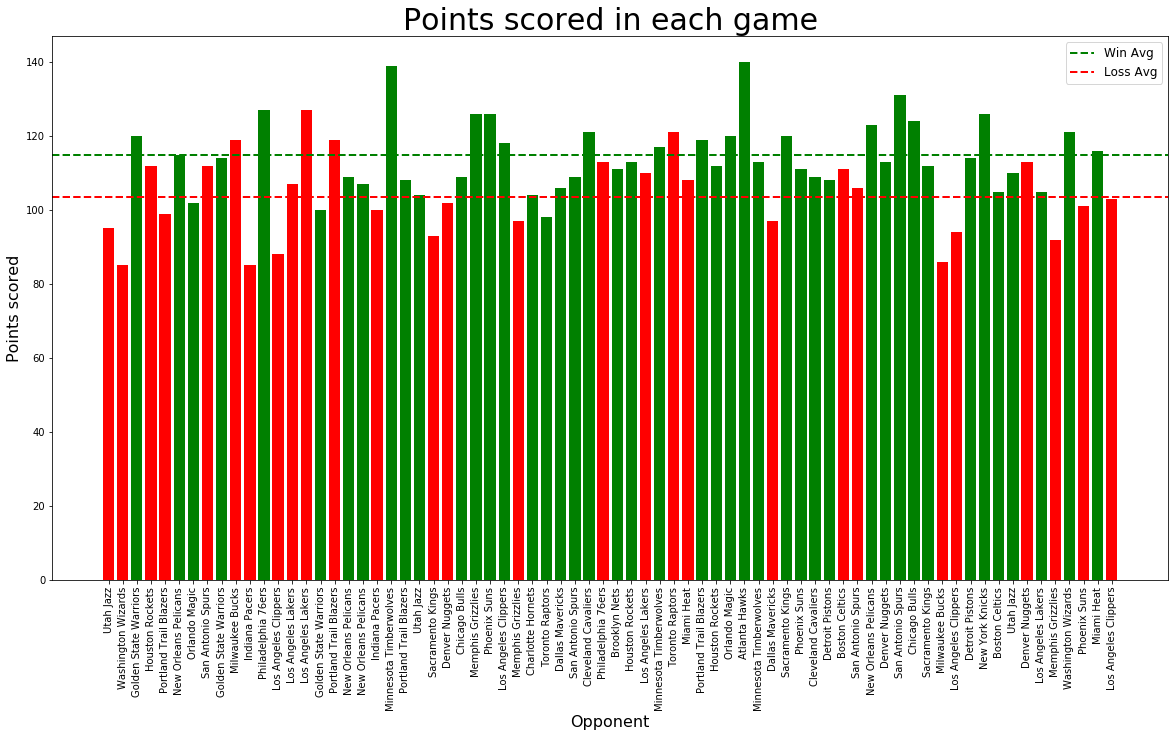

In [22]:
# Bar plot using matplotlib

plt.figure(figsize=(20,10))
x = plt.bar(MM['G'],MM['Tm'], color = col)
plt.xticks(np.arange(1,73),MM['Opponent'],rotation=90)
plt.title("Points scored in each game", fontsize=30)
plt.xlabel("Opponent", fontsize=16)
plt.ylabel("Points scored", fontsize=16)

# To draw the average dotted lines
plt.axhline(W['Tm'].mean(), color='green', linewidth=2, linestyle ="--")
plt.axhline(L['Tm'].mean(), color='red', linewidth=2, linestyle ="--")

plt.legend(avg, fontsize = 'large')
plt.show()

#for idx,value in enumerate(MM['Tm']):
#    x.text(idx,value + 0.3,str(value),ha = 'center')


In [23]:
#Printing the average values for wins and losses

print ('Average points scored in Winning matches:' , "{:.2f}".format(round(W['Tm'].mean(), 2)))
print ('Average points scored in Losing matches:', "{:.2f}".format(round(L['Tm'].mean(), 2)))

Average points scored in Winning matches: 114.89
Average points scored in Losing matches: 103.39


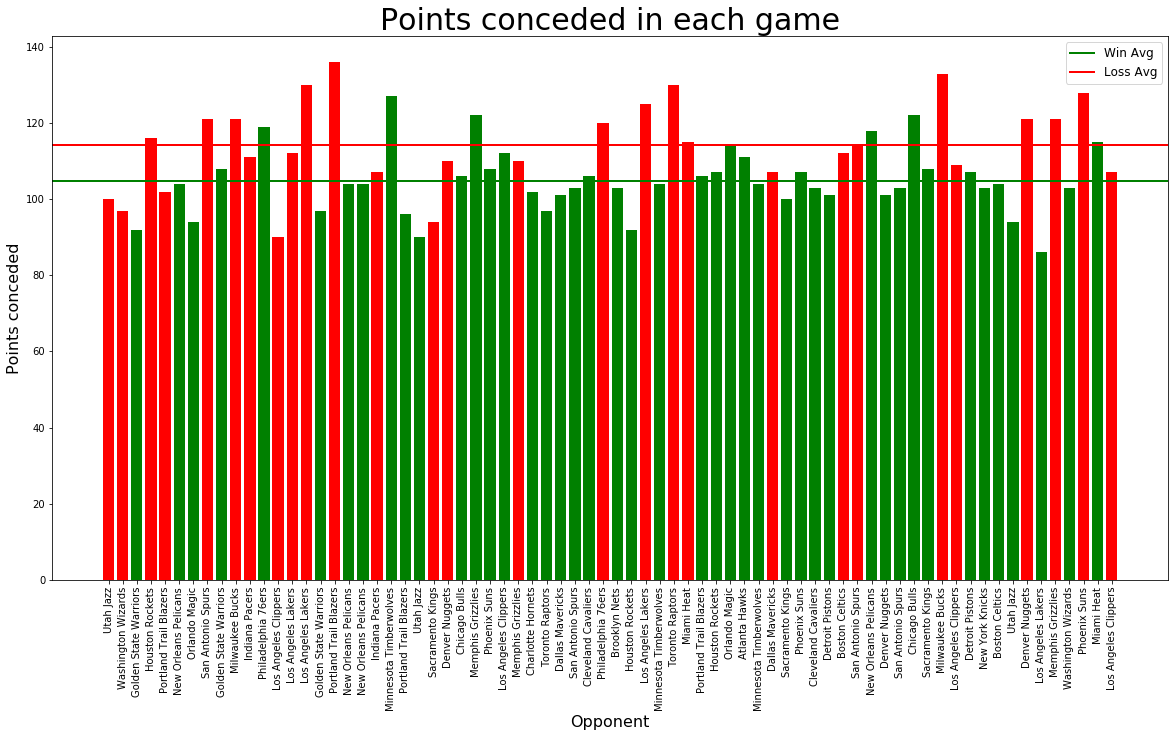

In [24]:
# Bar plot using matplotlib

plt.figure(figsize=(20,10))
plt.bar(MM['G'],MM['Opp'], color = col)
plt.xticks(np.arange(1,73),MM['Opponent'],rotation=90)
plt.title("Points conceded in each game", fontsize=30)
plt.xlabel("Opponent", fontsize=16)
plt.ylabel("Points conceded", fontsize=16)

# To draw the average dotted lines

plt.axhline(W['Opp'].mean(), color='green', linewidth=2, linestyle ="-")
plt.axhline(L['Opp'].mean(), color='red', linewidth=2, linestyle ="-")

plt.legend(avg, fontsize = 'large')
plt.show()


In [25]:
#Printing the average values for wins and losses

print ('Average points conceded in Winning matches:' , "{:.2f}".format(round(W['Opp'].mean(), 2)))
print ('Average points conceded in Losing matches:', "{:.2f}".format(round(L['Opp'].mean(), 2)))

Average points conceded in Winning matches: 104.73
Average points conceded in Losing matches: 114.25


In [163]:
Opp = MM['Opponent'].value_counts().rename_axis('Opponents').reset_index(name='GP')
Opp['GW']=0
Opp['GL']=0

Opp.head()
#MM['Opponent'].value_counts()

,Opponents,GP,GW,GL
0,New Orleans Pelicans,4,0,0
1,Los Angeles Lakers,4,0,0
2,San Antonio Spurs,4,0,0
3,Los Angeles Clippers,4,0,0
4,Portland Trail Blazers,4,0,0


In [164]:
CW=0
CL=0
i=0
for x in Opp['Opponents']:
    for idx, row in MM.iterrows():
        if (x== row['Opponent']) and (row['W/L']=='W'):
            CW+=1
        elif (x== row['Opponent']) and (row['W/L']=='L'):
            CL+=1
    Opp['GW'][i]=CW
    Opp['GL'][i]=CL
    i+=1
    CW=0
    CL=0


C:\Users\Guru Prasad\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Guru Prasad\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [165]:
Opp.head()

,Opponents,GP,GW,GL
0,New Orleans Pelicans,4,4,0
1,Los Angeles Lakers,4,1,3
2,San Antonio Spurs,4,2,2
3,Los Angeles Clippers,4,1,3
4,Portland Trail Blazers,4,2,2


In [166]:
Opp['Win%']=(Opp['GW']/Opp['GP'])*100

In [167]:
Opp['Win%'] = Opp['Win%'].apply('{:.2f}%'.format)
Opp

,Opponents,GP,GW,GL,Win%
0,New Orleans Pelicans,4,4,0,100.00%
1,Los Angeles Lakers,4,1,3,25.00%
2,San Antonio Spurs,4,2,2,50.00%
3,Los Angeles Clippers,4,1,3,25.00%
4,Portland Trail Blazers,4,2,2,50.00%
5,Memphis Grizzlies,3,1,2,33.33%
6,Utah Jazz,3,2,1,66.67%
7,Houston Rockets,3,2,1,66.67%
8,Denver Nuggets,3,1,2,33.33%
9,Minnesota Timberwolves,3,3,0,100.00%


In [177]:
# Printing the Unique Starting Lineups used this season

SL = MM['Starting Lineup'].value_counts().rename_axis('Lineups').reset_index(name='GP')
SL['GW']=0
SL['GL']=0
SL.head()

,Lineups,GP,GW,GL
0,S. Adams · T. Ferguson · D. Gallinari · S. Gil...,27,0,0
1,S. Adams · L. Dort · D. Gallinari · S. Gilgeou...,19,0,0
2,S. Adams · D. Bazley · T. Ferguson · S. Gilgeo...,5,0,0
3,T. Ferguson · D. Gallinari · S. Gilgeous-Alexa...,4,0,0
4,S. Adams · D. Gallinari · S. Gilgeous-Alexande...,4,0,0


In [178]:
CW=0
CL=0
i=0
for x in SL['Lineups']:
    for idx, row in MM.iterrows():
        if (x== row['Starting Lineup']) and (row['W/L']=='W'):
            CW+=1
        elif (x== row['Starting Lineup']) and (row['W/L']=='L'):
            CL+=1
    SL['GW'][i]=CW
    SL['GL'][i]=CL
    i+=1
    CW=0
    CL=0

C:\Users\Guru Prasad\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Guru Prasad\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [179]:
SL.head()

,Lineups,GP,GW,GL
0,S. Adams · T. Ferguson · D. Gallinari · S. Gil...,27,15,12
1,S. Adams · L. Dort · D. Gallinari · S. Gilgeou...,19,15,4
2,S. Adams · D. Bazley · T. Ferguson · S. Gilgeo...,5,4,1
3,T. Ferguson · D. Gallinari · S. Gilgeous-Alexa...,4,1,3
4,S. Adams · D. Gallinari · S. Gilgeous-Alexande...,4,2,2


In [180]:
SL['Win%']=(SL['GW']/SL['GP'])*100

In [181]:
SL['Win%'] = SL['Win%'].apply('{:.2f}%'.format)


,Lineups,GP,GW,GL,Win%
0,S. Adams · T. Ferguson · D. Gallinari · S. Gil...,27,15,12,55.56%
1,S. Adams · L. Dort · D. Gallinari · S. Gilgeou...,19,15,4,78.95%
2,S. Adams · D. Bazley · T. Ferguson · S. Gilgeo...,5,4,1,80.00%
3,T. Ferguson · D. Gallinari · S. Gilgeous-Alexa...,4,1,3,25.00%
4,S. Adams · D. Gallinari · S. Gilgeous-Alexande...,4,2,2,50.00%
5,L. Dort · D. Gallinari · S. Gilgeous-Alexander...,3,2,1,66.67%
6,L. Dort · D. Gallinari · S. Gilgeous-Alexander...,1,1,0,100.00%
7,S. Adams · D. Bazley · S. Gilgeous-Alexander ·...,1,1,0,100.00%
8,S. Adams · D. Bazley · L. Dort · S. Gilgeous-A...,1,1,0,100.00%
9,S. Adams · L. Dort · D. Gallinari · S. Gilgeou...,1,0,1,0.00%


In [184]:
pd.set_option('max_colwidth', 200)
#display(SL)
SL.style.set_properties(**{'text-align': 'left'})

,Lineups,GP,GW,GL,Win%
0,S. Adams · T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · C. Paul,27,15,12,55.56%
1,S. Adams · L. Dort · D. Gallinari · S. Gilgeous-Alexander · C. Paul,19,15,4,78.95%
2,S. Adams · D. Bazley · T. Ferguson · S. Gilgeous-Alexander · C. Paul,5,4,1,80.00%
3,T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · N. Noel · C. Paul,4,1,3,25.00%
4,S. Adams · D. Gallinari · S. Gilgeous-Alexander · A. Nader · C. Paul,4,2,2,50.00%
5,L. Dort · D. Gallinari · S. Gilgeous-Alexander · N. Noel · C. Paul,3,2,1,66.67%
6,L. Dort · D. Gallinari · S. Gilgeous-Alexander · M. Muscala · C. Paul,1,1,0,100.00%
7,S. Adams · D. Bazley · S. Gilgeous-Alexander · A. Nader · C. Paul,1,1,0,100.00%
8,S. Adams · D. Bazley · L. Dort · S. Gilgeous-Alexander · C. Paul,1,1,0,100.00%
9,S. Adams · L. Dort · D. Gallinari · S. Gilgeous-Alexander · D. Schröder,1,0,1,0.00%


In [185]:
L.head()

,G,Date,Start (ET),Opponent,W/L,Unnamed: 5,Tm,Opp,W,L,Streak,Starting Lineup
0,1,"Wed, Oct 23, 2019",9:00p,Utah Jazz,L,NaN,95,100,0,1,L 1,S. Adams · T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · C. Paul
1,2,"Fri, Oct 25, 2019",8:00p,Washington Wizards,L,NaN,85,97,0,2,L 2,S. Adams · T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · C. Paul
3,4,"Mon, Oct 28, 2019",8:00p,Houston Rockets,L,NaN,112,116,1,3,L 1,S. Adams · T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · C. Paul
4,5,"Wed, Oct 30, 2019",8:00p,Portland Trail Blazers,L,NaN,99,102,1,4,L 2,T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · N. Noel · C. Paul
7,8,"Thu, Nov 7, 2019",8:30p,San Antonio Spurs,L,NaN,112,121,3,5,L 1,S. Adams · T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · C. Paul


In [34]:
# Printing the Win % for different Starting Lineups
print("Win % for S. Adams , T. Ferguson , D. Gallinari , S. Gilgeous-Alexander , C. Paul :" , "{:.2f}".format(1500/27),"%")
print("Win % for S. Adams , L. Dort , D. Gallinari , S. Gilgeous-Alexander , C. Paul :" , "{:.2f}".format(1500/19),"%")
print("Win % for S. Adams , D. Bazley , T. Ferguson , S. Gilgeous-Alexander , C. Paul :" , "{:.2f}".format(400/5),"%")

Win % for S. Adams , T. Ferguson , D. Gallinari , S. Gilgeous-Alexander , C. Paul : 55.56 %
Win % for S. Adams , L. Dort , D. Gallinari , S. Gilgeous-Alexander , C. Paul : 78.95 %
Win % for S. Adams , D. Bazley , T. Ferguson , S. Gilgeous-Alexander , C. Paul : 80.00 %


# Visualising our season stats in comparison to other teams in the league

In [89]:
LS = pd.read_excel("OKC.xlsx", sheet_name='NBA 2019-20 Standings')
LS.set_index('TEAM',inplace=True)

In [90]:
A = LS.drop(['RK'], axis=1, inplace=True)
LS.head()

,GP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF,W,L,PCT,OPP PPG
TEAM,,,,,,,,,,,,,,,,,,,,,,,
Milwaukee Bucks,73,118.7,43.3,90.9,47.6,13.8,38.9,35.5,18.3,24.7,74.2,9.5,42.2,51.7,25.9,7.2,5.9,14.7,19.6,56,17,0.767,108.6
Houston Rockets,72,117.8,40.8,90.4,45.1,15.6,45.3,34.5,20.6,26.1,79.1,9.8,34.5,44.3,21.6,8.7,5.2,14.2,21.8,44,28,0.611,114.8
Dallas Mavericks,75,117.0,41.7,90.3,46.1,15.1,41.3,36.7,18.6,23.8,77.9,10.5,36.4,46.9,24.7,6.1,4.8,12.1,19.5,43,32,0.573,112.1
LA Clippers,72,116.3,41.6,89.2,46.6,12.4,33.5,37.1,20.8,26.3,79.1,10.7,37.0,47.7,23.7,7.1,4.7,14.0,22.1,49,23,0.681,109.9
New Orleans Pelicans,72,115.8,42.6,91.6,46.5,13.6,36.9,37.0,17.1,23.4,72.9,11.1,35.4,46.5,26.8,7.5,5.0,15.9,21.2,30,42,0.417,117.1


In [91]:
# Listing the column values and storing them in a list. I wanted to change the order of columns in the dataframe
# For example the, the I wanted 'PCT' column to be first column after 'GP'. 
# Hence i rearranged the columns and stored it a new dataframe for visualisation

#cols = list(LS.columns.values)
A = LS[[ 'GP', 'PCT', 'PTS', 'OPP PPG','FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OR', 'DR', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF']]

In [92]:
# Sorting the dataframe by PCT - winning percentage

Sorted = A.sort_values(by=['PCT'], ascending = False)

In [93]:
# Applying a colormap to the dataframe to visualize and compare the stats

cm = sns.light_palette("red", as_cmap=True)

(Sorted.style.background_gradient(cmap='viridis'))

,GP,PCT,PTS,OPP PPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF
TEAM,,,,,,,,,,,,,,,,,,,,,
Milwaukee Bucks,73,0.767,118.7,108.6,43.3,90.9,47.6,13.8,38.9,35.5,18.3,24.7,74.2,9.5,42.2,51.7,25.9,7.2,5.9,14.7,19.6
Toronto Raptors,72,0.736,112.8,106.5,40.2,87.9,45.8,13.8,37,37.4,18.5,23.2,79.6,9.5,35.9,45.4,25.2,8.8,5,14.1,21.7
Los Angeles Lakers,71,0.732,113.4,107.6,42.3,88.3,48,11,31.6,34.9,17.7,24.3,72.9,10.7,35.1,45.7,25.4,8.6,6.6,14.7,20.7
LA Clippers,72,0.681,116.3,109.9,41.6,89.2,46.6,12.4,33.5,37.1,20.8,26.3,79.1,10.7,37,47.7,23.7,7.1,4.7,14,22.1
Boston Celtics,72,0.667,113.7,107.3,41.3,89.6,46.1,12.6,34.5,36.4,18.6,23.2,80.1,10.7,35.4,46.1,23,8.3,5.6,13.2,21.6
Denver Nuggets,73,0.63,111.3,109.2,42,88.9,47.3,11,30.6,35.9,16.2,20.9,77.7,10.8,33.4,44.1,26.7,8,4.6,13.1,20.3
Indiana Pacers,73,0.616,109.4,107.5,42.1,88.5,47.6,10.2,28,36.3,15,19.1,78.7,8.7,34.1,42.8,25.9,7.4,5.2,12.7,19.8
Oklahoma City Thunder,72,0.611,110.4,108.4,40,85.5,46.8,10.7,30.2,35.5,19.8,24.8,79.6,8.2,34.7,42.9,21.7,7.6,4.9,13,19.3
Utah Jazz,72,0.611,111.3,108.8,40.1,85.1,47.1,13.4,35.2,38,17.8,22.8,77.9,9.1,35.8,44.9,22.4,6.1,4,14.6,20.4


# League ranking 

In [137]:
#Importing and preprocessing data

SW = pd.read_excel("OKC.xlsx", sheet_name='SW')
SW.drop(['G', 'MP'], axis=1, inplace = True)
SW.drop([SW.index[0], SW.index[4]] , axis=0, inplace= True)
SW.rename(columns={'Unnamed: 0': 'Index'}, inplace = True)
SW.at[6,'Index']='Lg Rank - Opp'
SW.at[7,'Index']='Year/Year - Opp'
SW.set_index('Index',inplace=True)
SW.head()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Index,,,,,,,,,,,,,,,,,,,,,
Team/G,40.000,85.50,0.468,10.700,30.200,0.355,29.300,55.300,0.529,19.800,24.800,0.796,8.200,34.700,42.900,21.700,7.600,4.900,13.700,19.300,110.400
Lg Rank,23.000,28.00,8.000,27.000,27.000,17.000,12.000,15.000,10.000,4.000,5.000,7.000,30.000,15.000,23.000,28.000,16.000,15.000,6.000,4.000,21.000
Year/Year,-0.062,-0.09,0.014,-0.059,-0.076,0.007,-0.064,-0.098,0.019,0.108,-0.007,0.083,-0.345,-0.024,-0.108,-0.072,-0.182,-0.054,-0.019,-0.139,-0.035
Opponent/G,40.800,89.60,0.455,11.300,33.300,0.340,29.500,56.400,0.523,15.500,19.600,0.795,10.500,34.300,44.800,23.000,7.000,4.000,14.200,22.800,108.400
Lg Rank - Opp,16.000,19.00,10.000,5.000,10.000,2.000,20.000,20.000,14.000,4.000,3.000,30.000,23.000,10.000,12.000,5.000,7.000,3.000,18.000,2.000,7.000


In [120]:
SW.dtypes

FG     object
FGA    object
FG%    object
3P     object
3PA    object
3P%    object
2P     object
2PA    object
2P%    object
FT     object
FTA    object
FT%    object
ORB    object
DRB    object
TRB    object
AST    object
STL    object
BLK    object
TOV    object
PF     object
PTS    object
dtype: object

In [138]:
SW.loc['Year/Year'] = pd.to_numeric(SW.loc['Year/Year']*100).astype(float)
SW.loc['Year/Year - Opp'] = pd.to_numeric(SW.loc['Year/Year - Opp']*100).astype(float)

In [130]:
#SW.loc['Year/Year'] = SW.loc['Year/Year'].apply('{:.2f}%'.format)
#SW.loc['Year/Year - Opp'] = SW.loc['Year/Year - Opp'].apply('{:.2f}%'.format)
#SW.head()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Index,,,,,,,,,,,,,,,,,,,,,
Team/G,40,85.5,0.468,10.7,30.2,0.355,29.3,55.3,0.529,19.8,24.8,0.796,8.2,34.7,42.9,21.7,7.6,4.9,13.7,19.3,110.4
Lg Rank,23,28,8,27,27,17,12,15,10,4,5,7,30,15,23,28,16,15,6,4,21
Year/Year,-6.20%,-9.00%,1.40%,-5.90%,-7.60%,0.70%,-6.40%,-9.80%,1.90%,10.80%,-0.70%,8.30%,-34.50%,-2.40%,-10.80%,-7.20%,-18.20%,-5.40%,-1.90%,-13.90%,-3.50%
Opponent/G,40.8,89.6,0.455,11.3,33.3,0.34,29.5,56.4,0.523,15.5,19.6,0.795,10.5,34.3,44.8,23,7,4,14.2,22.8,108.4
Lg Rank - Opp,16,19,10,5,10,2,20,20,14,4,3,30,23,10,12,5,7,3,18,2,7


In [143]:
# function to color the negative values as red
def color_negative_red(value):

    if value < 0:
        color = 'red'
        
    else:
        color = 'black'

    return 'color: %s' % color

SW.style.applymap(color_negative_red, subset=['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%','FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']).format({'Year/Year': '{:0.2f}%', 'Year/Year - Opp': '{:0.2f}%'})

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Index,,,,,,,,,,,,,,,,,,,,,
Team/G,40,85.5,0.468,10.7,30.2,0.355,29.3,55.3,0.529,19.8,24.8,0.796,8.2,34.7,42.9,21.7,7.6,4.9,13.7,19.3,110.4
Lg Rank,23,28,8,27,27,17,12,15,10,4,5,7,30,15,23,28,16,15,6,4,21
Year/Year,-6.2,-9,1.4,-5.9,-7.6,0.7,-6.4,-9.8,1.9,10.8,-0.7,8.3,-34.5,-2.4,-10.8,-7.2,-18.2,-5.4,-1.9,-13.9,-3.5
Opponent/G,40.8,89.6,0.455,11.3,33.3,0.34,29.5,56.4,0.523,15.5,19.6,0.795,10.5,34.3,44.8,23,7,4,14.2,22.8,108.4
Lg Rank - Opp,16,19,10,5,10,2,20,20,14,4,3,30,23,10,12,5,7,3,18,2,7
Year/Year - Opp,0.1,1.1,-0.5,0.5,5.2,-1.6,-0.1,-1.2,0.6,-15,-18.6,3.4,5.9,-4.1,-1.9,-7.5,-14.4,-20.4,-15,1.4,-2.4


In [44]:
Transpose = SW.transpose()
Transpose

,1,2,3,5,6,7
Index,Team/G,Lg Rank,Year/Year,Opponent/G,Lg Rank,Year/Year
FG,40,23,-0.062,40.8,16,0.001
FGA,85.5,28,-0.09,89.6,19,0.011
FG%,0.468,8,0.014,0.455,10,-0.005
3P,10.7,27,-0.059,11.3,5,0.005
3PA,30.2,27,-0.076,33.3,10,0.052
3P%,0.355,17,0.007,0.34,2,-0.016
2P,29.3,12,-0.064,29.5,20,-0.001
2PA,55.3,15,-0.098,56.4,20,-0.012
2P%,0.529,10,0.019,0.523,14,0.006


In [45]:
# Converting the data type from object to integer for Lg rank columns
Transpose.iloc[:,1][1:] = pd.to_numeric(Transpose.iloc[:,1][1:]).astype(int)
Transpose.iloc[:,4][1:] = pd.to_numeric(Transpose.iloc[:,4][1:]).astype(int)

In [46]:
# Sorting the values and the index for Lg rank column - thunders
x = Transpose.iloc[:,1][1:].sort_values().index
y = Transpose.iloc[:,1][1:].sort_values().array

In [47]:
# Sorting the values and the index for Lg rank column - opponents
a = Transpose.iloc[:,4][1:].sort_values().index
b = Transpose.iloc[:,4][1:].sort_values().array

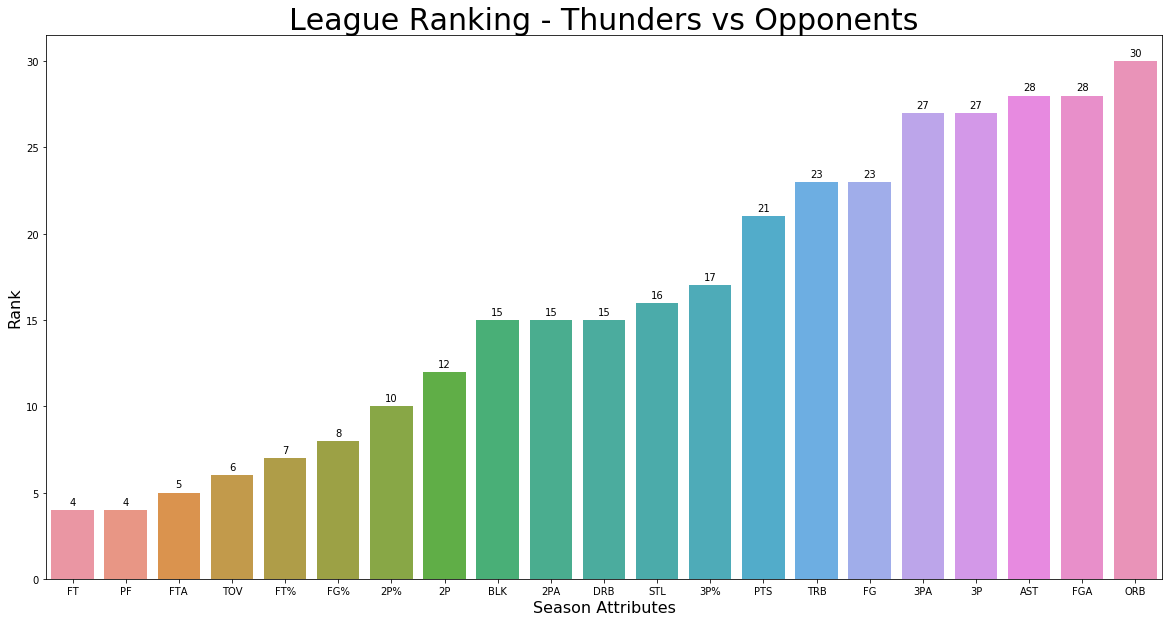

In [48]:
# bar plot to visualisation

plt.figure(figsize=(20,10))
p = sns.barplot(x = x, y = y)
plt.title("League Ranking - Thunders vs Opponents", fontsize=30)
plt.xlabel("Season Attributes", fontsize=16)
plt.ylabel("Rank", fontsize=16)

# for loop to print values on bar chart
for idx,value in enumerate(y):
    p.text(idx,value + 0.3,str(value),ha = 'center')

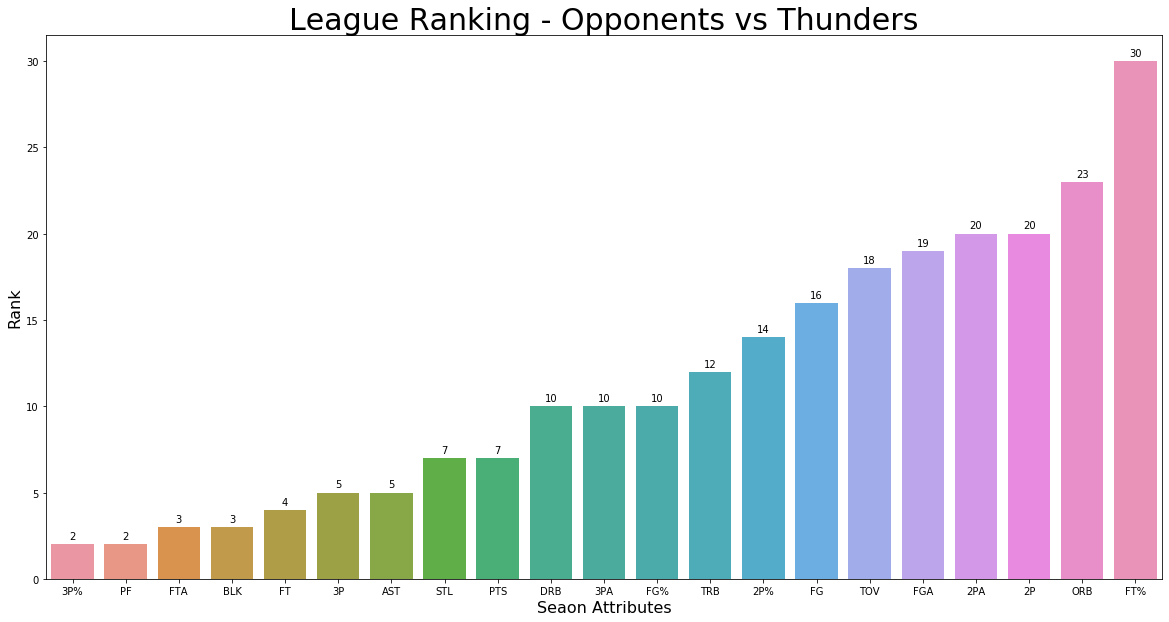

In [49]:
# bar plot to visualisation

plt.figure(figsize=(20,10))
p = sns.barplot(x = a, y = b)
plt.title("League Ranking - Opponents vs Thunders", fontsize=30)
plt.xlabel("Seaon Attributes", fontsize=16)
plt.ylabel("Rank", fontsize=16)

# for loop to print values on bar chart
for idx,value in enumerate(b):
    p.text(idx,value + 0.3,str(value),ha = 'center')

In [148]:
TRS = pd.read_excel("OKC.xlsx", sheet_name='Thunders - regular season')
TRS.drop([TRS.index[17]] , axis=0, inplace= True)
TRS.drop(['AST/TO'], axis=1, inplace = True)

TRS.head()

,NAME,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,PER,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,EFG%
0,Shai Gilgeous-Alexander SG,70,70,34.7,19.0,0.7,5.2,5.9,3.3,1.1,0.7,1.9,1.7,17.76,6.8,14.5,47.1,1.2,3.6,34.7,4.1,5.1,80.7,5.6,10.9,51.2,1.311,0.51,0.514
1,Dennis Schroder PG,65,2,30.8,18.9,0.3,3.3,3.6,4.0,0.7,0.2,2.6,2.2,16.77,7.0,14.8,46.9,1.9,5.0,38.5,3.0,3.6,83.9,5.0,9.8,51.2,1.274,0.53,0.534
2,Danilo Gallinari PF,62,62,29.6,18.7,0.5,4.6,5.2,1.9,0.7,0.1,1.2,1.2,19.50,5.8,13.2,43.8,2.9,7.1,40.5,4.3,4.8,89.3,2.9,6.1,47.6,1.420,0.55,0.547
3,Chris Paul PG,70,70,31.5,17.6,0.4,4.6,5.0,6.7,1.6,0.2,2.3,2.3,21.72,6.2,12.7,48.9,1.6,4.3,36.5,3.6,4.0,90.7,4.6,8.3,55.4,1.389,0.55,0.552
4,Steven Adams C,63,63,26.7,10.9,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,20.48,4.5,7.6,59.2,0.0,0.0,33.3,1.9,3.2,58.2,4.5,7.5,59.4,1.431,0.59,0.593


In [149]:
TRS[['EFG%']] = TRS[['EFG%']] * 100
TRS.head()

,NAME,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,PER,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,EFG%
0,Shai Gilgeous-Alexander SG,70,70,34.7,19.0,0.7,5.2,5.9,3.3,1.1,0.7,1.9,1.7,17.76,6.8,14.5,47.1,1.2,3.6,34.7,4.1,5.1,80.7,5.6,10.9,51.2,1.311,0.51,51.4
1,Dennis Schroder PG,65,2,30.8,18.9,0.3,3.3,3.6,4.0,0.7,0.2,2.6,2.2,16.77,7.0,14.8,46.9,1.9,5.0,38.5,3.0,3.6,83.9,5.0,9.8,51.2,1.274,0.53,53.4
2,Danilo Gallinari PF,62,62,29.6,18.7,0.5,4.6,5.2,1.9,0.7,0.1,1.2,1.2,19.50,5.8,13.2,43.8,2.9,7.1,40.5,4.3,4.8,89.3,2.9,6.1,47.6,1.420,0.55,54.7
3,Chris Paul PG,70,70,31.5,17.6,0.4,4.6,5.0,6.7,1.6,0.2,2.3,2.3,21.72,6.2,12.7,48.9,1.6,4.3,36.5,3.6,4.0,90.7,4.6,8.3,55.4,1.389,0.55,55.2
4,Steven Adams C,63,63,26.7,10.9,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,20.48,4.5,7.6,59.2,0.0,0.0,33.3,1.9,3.2,58.2,4.5,7.5,59.4,1.431,0.59,59.3


In [52]:
Career = pd.read_excel("OKC.xlsx", sheet_name='Career')
Career[['3P%','2P%','eFG%','FT%']] = Career[['3P%','2P%','eFG%','FT%']] * 100
Career.head()

,Name,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Shai Gilgeous-Alexander SG,152,143,30.3,5.4,11.4,0.473,0.9,2.6,35.4,4.5,8.8,50.8,51.3,2.9,3.6,80.4,0.7,3.6,4.2,3.3,1.2,0.6,1.8,1.9,14.6
1,Dennis Schroder PG,496,177,25.5,5.3,12.2,0.436,1.1,3.4,33.7,4.2,8.8,47.4,48.2,2.3,2.8,82.8,0.4,2.4,2.8,4.6,0.8,0.1,2.4,1.9,14.1
2,Danilo Gallinari PF,611,541,30.9,4.9,11.5,0.427,2.0,5.2,38.0,2.9,6.3,46.5,51.3,4.4,5.0,87.3,0.7,4.2,4.9,2.0,0.8,0.4,1.3,1.8,16.2
3,Chris Paul PG,1020,1020,34.9,6.5,13.7,0.471,1.4,3.7,37.0,5.1,10.1,50.7,52.0,4.2,4.8,87.0,0.7,3.9,4.5,9.5,2.2,0.1,2.4,2.5,18.5
4,Steven Adams C,530,466,26.8,4.1,6.9,0.589,0.0,0.0,10.0,4.1,6.9,59.0,58.9,1.7,3.0,55.7,3.4,4.2,7.6,1.2,0.9,1.0,1.4,2.6,9.8


In [153]:
for i in TRS.index:
    TRS.loc['NAME'] = unicodedata.normalize("NFKD", TRS['NAME'][i])
    #print(TRS['NAME'])

In [154]:
TRS['Position'] = [ x[len(x)-x[::-1].find(' '):]  for x in TRS['NAME']]

# df['Country'] = [ x[:x.find('(') - 1] for x in df.index]
TRS.head()

,NAME,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,PER,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,EFG%,Position
0,Shai Gilgeous-Alexander SG,70,70,34.7,19,0.7,5.2,5.9,3.3,1.1,0.7,1.9,1.7,17.76,6.8,14.5,47.1,1.2,3.6,34.7,4.1,5.1,80.7,5.6,10.9,51.2,1.311,0.51,51.4,Gilgeous-Alexander SG
1,Dennis Schroder PG,65,2,30.8,18.9,0.3,3.3,3.6,4,0.7,0.2,2.6,2.2,16.77,7,14.8,46.9,1.9,5,38.5,3,3.6,83.9,5,9.8,51.2,1.274,0.53,53.4,Schroder PG
2,Danilo Gallinari PF,62,62,29.6,18.7,0.5,4.6,5.2,1.9,0.7,0.1,1.2,1.2,19.5,5.8,13.2,43.8,2.9,7.1,40.5,4.3,4.8,89.3,2.9,6.1,47.6,1.42,0.55,54.7,Gallinari PF
3,Chris Paul PG,70,70,31.5,17.6,0.4,4.6,5,6.7,1.6,0.2,2.3,2.3,21.72,6.2,12.7,48.9,1.6,4.3,36.5,3.6,4,90.7,4.6,8.3,55.4,1.389,0.55,55.2,Paul PG
4,Steven Adams C,63,63,26.7,10.9,3.3,6,9.3,2.3,0.8,1.1,1.5,1.9,20.48,4.5,7.6,59.2,0,0,33.3,1.9,3.2,58.2,4.5,7.5,59.4,1.431,0.59,59.3,Adams C


In [155]:
TRS['NAME'] = [ x[:len(x)-x[::-1].find(' ')-1]  for x in TRS['NAME']]

In [59]:
TRS.head()

,NAME,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,PER,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,EFG%,Position
0,Shai Gilgeous-Alexander,70,70,34.7,19.0,0.7,5.2,5.9,3.3,1.1,0.7,1.9,1.7,17.76,6.8,14.5,47.1,1.2,3.6,34.7,4.1,5.1,80.7,5.6,10.9,51.2,1.311,0.51,51.4,SG
1,Dennis Schroder,65,2,30.8,18.9,0.3,3.3,3.6,4.0,0.7,0.2,2.6,2.2,16.77,7.0,14.8,46.9,1.9,5.0,38.5,3.0,3.6,83.9,5.0,9.8,51.2,1.274,0.53,53.4,PG
2,Danilo Gallinari,62,62,29.6,18.7,0.5,4.6,5.2,1.9,0.7,0.1,1.2,1.2,19.50,5.8,13.2,43.8,2.9,7.1,40.5,4.3,4.8,89.3,2.9,6.1,47.6,1.420,0.55,54.7,PF
3,Chris Paul,70,70,31.5,17.6,0.4,4.6,5.0,6.7,1.6,0.2,2.3,2.3,21.72,6.2,12.7,48.9,1.6,4.3,36.5,3.6,4.0,90.7,4.6,8.3,55.4,1.389,0.55,55.2,PG
4,Steven Adams,63,63,26.7,10.9,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,20.48,4.5,7.6,59.2,0.0,0.0,33.3,1.9,3.2,58.2,4.5,7.5,59.4,1.431,0.59,59.3,C


In [60]:
Sort = TRS.sort_values(by=['NAME'])
Sort.head()

,NAME,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,PER,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,EFG%,Position
8,Abdel Nader,55,6,15.8,6.3,0.3,1.6,1.8,0.7,0.4,0.4,0.8,1.4,11.36,2.2,4.8,46.8,0.9,2.3,37.5,0.9,1.2,77.3,1.4,2.5,55.6,1.312,0.56,55.9,SF
12,Andre Roberson,7,0,12.4,2.9,1.0,2.9,3.9,0.6,0.1,0.4,0.3,1.9,5.46,1.1,4.1,27.6,0.4,2.0,21.4,0.1,0.3,50.0,0.7,2.1,33.3,0.690,0.33,32.8,SG
3,Chris Paul,70,70,31.5,17.6,0.4,4.6,5.0,6.7,1.6,0.2,2.3,2.3,21.72,6.2,12.7,48.9,1.6,4.3,36.5,3.6,4.0,90.7,4.6,8.3,55.4,1.389,0.55,55.2,PG
2,Danilo Gallinari,62,62,29.6,18.7,0.5,4.6,5.2,1.9,0.7,0.1,1.2,1.2,19.50,5.8,13.2,43.8,2.9,7.1,40.5,4.3,4.8,89.3,2.9,6.1,47.6,1.420,0.55,54.7,PF
9,Darius Bazley,61,9,18.5,5.6,0.5,3.5,4.0,0.7,0.4,0.7,0.7,0.9,9.64,2.0,5.2,39.4,0.8,2.3,34.8,0.7,1.0,69.4,1.2,2.9,43.2,1.079,0.47,47.2,SF


In [61]:
SortC = Career.sort_values(by=['Name'])

In [62]:
SO = Sort[['PTS','AST','3P%','2P%','EFG%','FT%']]
SO.head()

,PTS,AST,3P%,2P%,EFG%,FT%
8,6.3,0.7,37.5,55.6,55.9,77.3
12,2.9,0.6,21.4,33.3,32.8,50.0
3,17.6,6.7,36.5,55.4,55.2,90.7
2,18.7,1.9,40.5,47.6,54.7,89.3
9,5.6,0.7,34.8,43.2,47.2,69.4


In [63]:
CO = SortC[['PTS','AST','3P%','2P%','eFG%','FT%']]
CO.head()

,PTS,AST,3P%,2P%,eFG%,FT%
8,4.5,0.5,35.2,48.2,50.3,71.6
12,4.6,0.9,25.5,60.4,52.3,46.8
3,18.5,9.5,37.0,50.7,52.0,87.0
2,16.2,2.0,38.0,46.5,51.3,87.3
9,5.6,0.7,34.8,43.2,47.2,69.4


0
PTS
1
AST
2
3P%
3
2P%
4
EFG%
5
FT%


C:\Users\Guru Prasad\Anaconda3\lib\site-packages\matplotlib\projections\polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


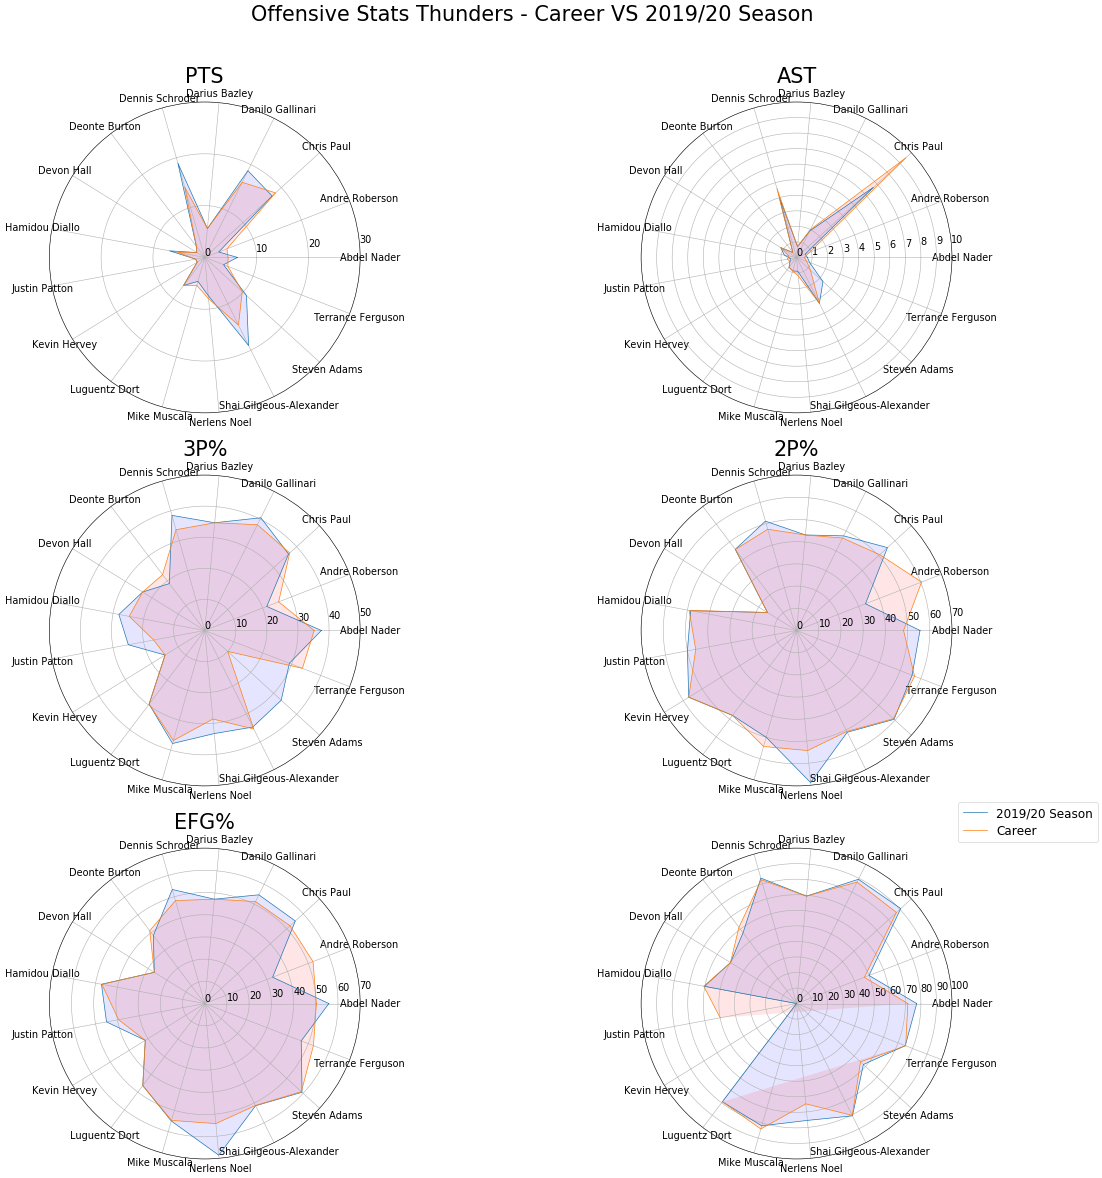

In [64]:
#Visualizing the performance of players using Spider plot

my_dpi=50
plt.figure(figsize=(1400/my_dpi, 1400/my_dpi), dpi=my_dpi)

cols = SO.columns.values.tolist()

for i in range(0,len(cols)):
    print(i)
    print(cols[i])
    plt.title(cols[i-1], size=30, y=1.05)
    # number of variable
    categories=list(Sort['NAME'])
    N = len(categories)

    # finding the angle of each axis in the plot (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,2,i+1, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=14, rotation = 30)

    if (cols[i] == 'PTS'):
        ax.set_rlabel_position(5)
        plt.yticks([0,10,20,30], ["0","10","20","30",], color="black", size=14)
        plt.ylim(0,30)
    
    elif (cols[i] == 'AST'):
        ax.set_rlabel_position(5)
        plt.yticks([0,1,2,3,4,5,6,7,8,9,10], ["0","1","2","3","4","5","6","7","8","9","10"], color="black", size=14)
        plt.ylim(0,10)
    
    elif (cols[i] == '3P%'):
        ax.set_rlabel_position(5)
        plt.yticks([0,10,20,30,40,50], ["0","10","20","30","40","50"], color="black", size=14)
        plt.ylim(0,50)
    
    elif (cols[i] == '2P%') or (cols[i] == 'EFG%') or (cols[i] == 'eFG%'):
        ax.set_rlabel_position(5)
        plt.yticks([0,10,20,30,40,50,60,70], ["0","10","20","30","40","50","60","70"], color="black", size=14)
        plt.ylim(0,70)
    
    else:    
        # Draw ylabels
        ax.set_rlabel_position(5)
        plt.yticks([0,10,20,30,40,50,60,70,80,90,100], ["0","10","20","30","40","50","60","70","80","90","100"], color="black", size=14)
        plt.ylim(0,100)

    # Plot data
    values=SO.iloc[:,i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label= '2019/20 Season')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    # Plot data
    values=CO.iloc[:,i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label='Career')
    # Fill area
    ax.fill(angles, values, 'r', alpha=0.1)
    
plt.legend(loc= 3 ,bbox_to_anchor=(1, 1), fontsize = 'xx-large')
plt.title("Offensive Stats Thunders - Career VS 2019/20 Season", size=30 , horizontalalignment = 'center', x=-0.35,y=3.65)

plt.show()

In [65]:
SD = TRS[['NAME','STL','REB','BLK','TO']]
SD.head()

,NAME,STL,REB,BLK,TO
0,Shai Gilgeous-Alexander,1.1,5.9,0.7,1.9
1,Dennis Schroder,0.7,3.6,0.2,2.6
2,Danilo Gallinari,0.7,5.2,0.1,1.2
3,Chris Paul,1.6,5.0,0.2,2.3
4,Steven Adams,0.8,9.3,1.1,1.5


In [66]:
CD = Career[['Name','STL','TRB','BLK','TOV']]
CD.head()

,Name,STL,TRB,BLK,TOV
0,Shai Gilgeous-Alexander SG,1.2,4.2,0.6,1.8
1,Dennis Schroder PG,0.8,2.8,0.1,2.4
2,Danilo Gallinari PF,0.8,4.9,0.4,1.3
3,Chris Paul PG,2.2,4.5,0.1,2.4
4,Steven Adams C,0.9,7.6,1.0,1.4


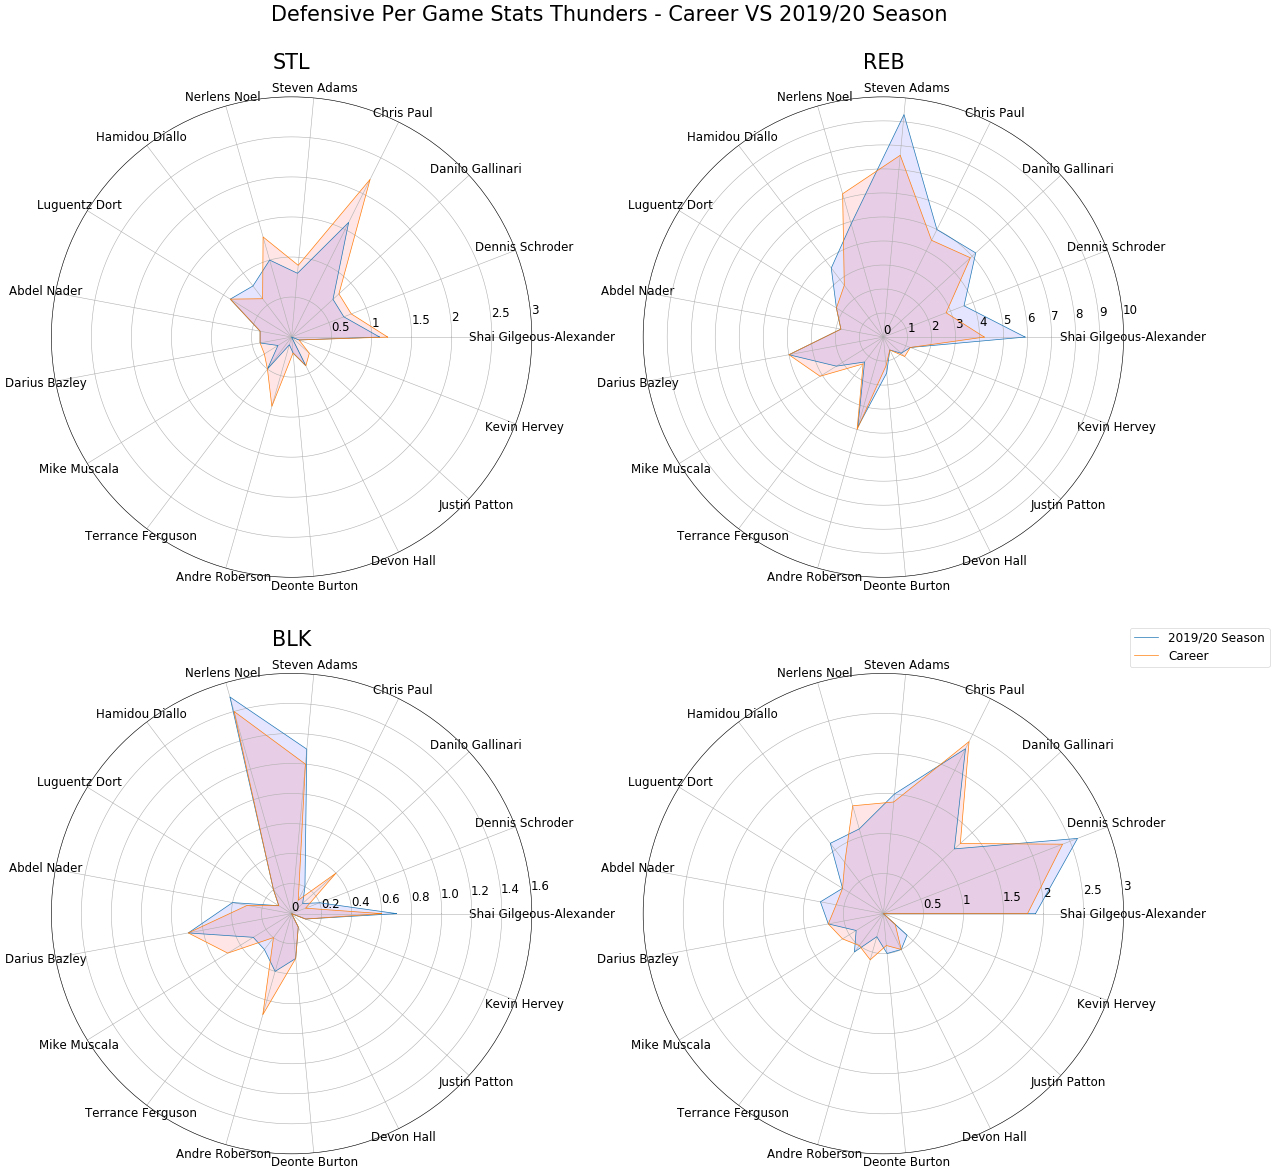

In [67]:
#Visualizing the performance of players using Spider plot

my_dpi=50
plt.figure(figsize=(1400/my_dpi, 1400/my_dpi), dpi=my_dpi)

cols = SD.columns.values.tolist()

for i in range(0,len(cols)-1):
    #print(i)
    # number of variable
    categories=list(SD['NAME'])
    N = len(categories)

    # finding the angle of each axis in the plot (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,i+1, polar=True)


    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=17, rotation = 30)

    if (cols[i+1] == 'STL') or (cols[i+1] == 'TO') or (cols[i+1] == 'TOV'):
        ax.set_rlabel_position(5)
        plt.yticks([0.5,1,1.5,2,2.5,3], ["0.5","1","1.5","2","2.5","3"], color="black", size=17)
        plt.ylim(0,3)
    
    elif (cols[i+1] == 'BLK'):
        ax.set_rlabel_position(5)
        plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6], ["0","0.2","0.4","0.6","0.8","1.0","1.2","1.4","1.6"], color="black", size=17)
        plt.ylim(0,1.6)
    
    else:    
        # Draw ylabels
        ax.set_rlabel_position(5)
        plt.yticks([0,1,2,3,4,5,6,7,8,9,10], ["0","1","2","3","4","5","6","7","8","9","10"], color="black", size=17)
        plt.ylim(0,10)

    # Plot data
    values=SD.iloc[:,i+1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label= '2019/20 Season')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    # Plot data
    values=CD.iloc[:,i+1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label='Career')
    # Fill area
    ax.fill(angles, values, 'r', alpha=0.1)
    
    plt.title(cols[i+1], size=30, y=1.05)

plt.legend(loc= 3 ,bbox_to_anchor=(1, 1), fontsize = 'xx-large')
plt.title("Defensive Per Game Stats Thunders - Career VS 2019/20 Season", size=30 , horizontalalignment = 'center', x=-0.07, y=2.35)

plt.show()